In [ ]:
import numpy as np
import pandas as pd 

In [7]:
df = pd.read_csv(r"C:\Users\Navneetrgiri\Downloads\placement.csv")

In [8]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [10]:
df.shape

(100, 4)

In [11]:
df = df.iloc[:,1:]

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [13]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [15]:
import matplotlib.pyplot as plt


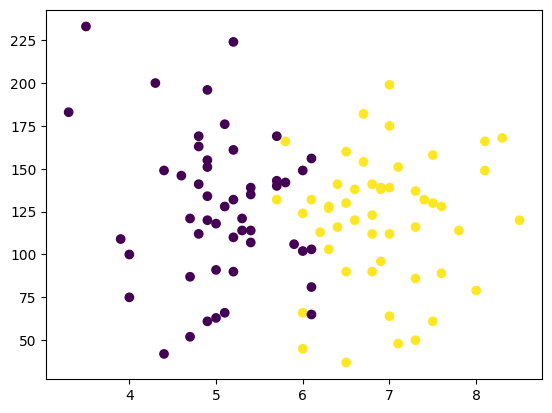

In [16]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [17]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y.shape

(100,)

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [79]:
X_train

,cgpa,iq
80,4.9,196.0
52,7.0,175.0
12,5.4,139.0
50,3.5,233.0
69,8.5,120.0
...,...,...
14,6.1,103.0
81,5.4,107.0
60,6.9,139.0
82,6.5,37.0


In [22]:
y_train

79    1
21    1
96    0
67    0
75    0
     ..
56    0
29    1
97    1
94    0
49    0
Name: placement, Length: 90, dtype: int64

In [23]:
X_test

,cgpa,iq
11,6.9,138.0
28,5.2,90.0
80,4.9,196.0
92,5.2,110.0
2,5.3,121.0
46,5.3,114.0
33,6.0,149.0
12,5.4,139.0
86,5.1,128.0
26,7.0,199.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train

array([[ 0.40116388, -0.7976147 ],
       [ 0.91450156,  0.72601254],
       [-1.39551797, -1.99653449],
       [-0.88218029, -0.09824482],
       [-1.05329285,  1.17560746],
       [-0.88218029, -1.47200708],
       [ 1.25672667,  0.90085501],
       [ 0.23005133,  0.15153014],
       [-1.73774308, -0.54783974],
       [ 1.77006434,  0.67605755],
       [-0.79662402, -1.39707459],
       [ 0.82894528, -1.44702958],
       [-0.28328634,  0.52619258],
       [-2.16552447,  2.77416719],
       [ 0.743389  , -0.64774972],
       [ 1.08561411, -0.14819981],
       [ 0.40116388, -2.12142197],
       [ 1.68450806, -1.07236715],
       [ 0.65783272, -0.7976147 ],
       [-0.28328634,  0.25144012],
       [ 0.48672016,  0.4013051 ],
       [-1.39551797,  0.67605755],
       [-0.53995518, -0.1981548 ],
       [-0.96773657,  0.30139511],
       [ 0.14449505, -0.22313229],
       [-0.88218029, -0.7726372 ],
       [ 1.25672667, -1.52196207],
       [-0.71106774,  0.25144012],
       [-1.48107425,

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[ 0.743389  ,  0.4013051 ],
       [-0.71106774, -0.7976147 ],
       [-0.96773657,  1.84999985],
       [-0.71106774, -0.29806478],
       [-0.62551146, -0.02331233],
       [-0.62551146, -0.1981548 ],
       [-0.02661751,  0.67605755],
       [-0.53995518,  0.42628259],
       [-0.79662402,  0.15153014],
       [ 0.82894528,  1.92493234]])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()

In [32]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred = clf.predict(X_test)

In [34]:
y_test

11    1
28    0
80    0
92    0
2     0
46    0
33    0
12    0
86    0
26    1
Name: placement, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.9

In [38]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

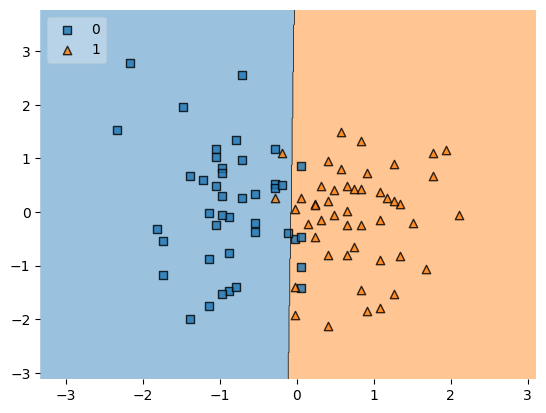

In [39]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))